'fio_results_comparison_plot.png'

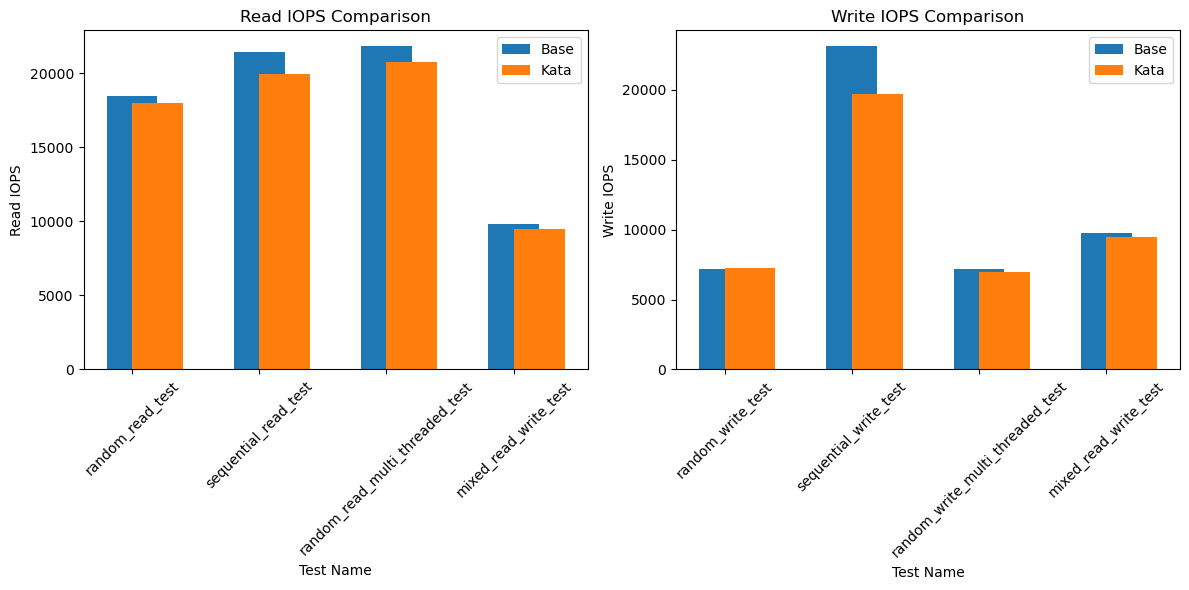

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
base_df = pd.read_csv('fio_results_base.csv')
kata_df = pd.read_csv('fio_results_kata.csv')

# Merge the two dataframes for easier comparison
merged_df = base_df.merge(kata_df, on='Test Name', suffixes=('_Base', '_Kata'))

# Filter for Read IOPS: Exclude tests where both Base and Kata results are 0
filtered_df_read = merged_df[(merged_df['Read IOPS_Base'] != 0) | (merged_df['Read IOPS_Kata'] != 0)]

# Filter for Write IOPS: Exclude tests where both Base and Kata results are 0
filtered_df_write = merged_df[(merged_df['Write IOPS_Base'] != 0) | (merged_df['Write IOPS_Kata'] != 0)]

# File path for the saved plot
output_file_path = 'fio_results_comparison_plot.png'

# Plotting the graph
plt.figure(figsize=(12, 6))

# Read IOPS comparison
plt.subplot(1, 2, 1)
plt.bar(filtered_df_read['Test Name'], filtered_df_read['Read IOPS_Base'], width=0.4, label='Base', align='center')
plt.bar(filtered_df_read['Test Name'], filtered_df_read['Read IOPS_Kata'], width=0.4, label='Kata', align='edge')
plt.xlabel('Test Name')
plt.ylabel('Read IOPS')
plt.title('Read IOPS Comparison')
plt.xticks(rotation=45)
plt.legend()

# Write IOPS comparison
plt.subplot(1, 2, 2)
plt.bar(filtered_df_write['Test Name'], filtered_df_write['Write IOPS_Base'], width=0.4, label='Base', align='center')
plt.bar(filtered_df_write['Test Name'], filtered_df_write['Write IOPS_Kata'], width=0.4, label='Kata', align='edge')
plt.xlabel('Test Name')
plt.ylabel('Write IOPS')
plt.title('Write IOPS Comparison')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.savefig(output_file_path)

output_file_path
